# Image Classification
In this exercise, you will be classifying images about clothes. The data set you will be using is called `fashion-small.csv`.

### Remember our main steps motto _isbe_.
1. i - Inspect and explore data.
2. s - Select and engineer features.
3. b - Build and train model.
4. e - Evaluate model.


In [2]:
# Import your libraries
import pandas as pd
import numpy as np

#Classifiers
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#Metrics for plot_confusion_patrix and classification_report
from sklearn import metrics

#For splitting data
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

# 1. Inspect and explore our data
1. Load the `fashion-small.csv` data into a pandas dataframe. 
2. Inspect / remove null values. 
3. Inspect / remove duplicate rows. 
4. Print out the number examples in each class aka the class balances. 
5. Visualize at least one image.

In [3]:
# 1. Load data into a pandas dataframe. 
df = pd.read_csv('data/fashion-small.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,T-shirt/top,0,0,0,0,0,0,0,0,0,...,66,25,0,0,0,0,0,0,0,0
1,Trouser,0,0,0,0,0,0,0,0,0,...,170,25,0,0,0,0,0,0,0,0
2,Dress,0,0,0,0,0,0,0,0,0,...,76,80,0,0,0,1,0,0,0,0
3,Ankle boot,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Dress,0,0,0,0,0,0,0,22,53,...,79,78,18,0,2,0,0,0,0,0


### Inspect for null values

In [5]:
# 2. Inspect / remove null values. 
df.isnull().sum().sum()

0

### Check for duplicates

In [7]:
# 3. Inspect / remove duplicate rows. 
df.duplicated().sum()

0

### Lets look at our class balances

In [8]:
# 4. Print out the number examples in each class aka the class balances. 
df.label.value_counts()

Sandal         646
Trouser        612
Ankle boot     605
Shirt          601
Pullover       598
Coat           597
T-shirt/top    590
Dress          585
Bag            584
Sneaker        582
Name: label, dtype: int64

# Visualize one image

## First, we need to create a list that is just our pixel columns

In [20]:
# Grabs all of the columns 
pixel_cols = df.columns

# Convert the all columns object into a regular list
pixel_cols = list(pixel_cols)

# Sanity check that it is now just a list.
print(type(pixel_cols))

# Remove just the label column from the list
pixel_cols.remove('label')


<class 'list'>


## Extract one row and reshape it to its original 28x28 shape and plot the reshaped image.

<class 'numpy.ndarray'>


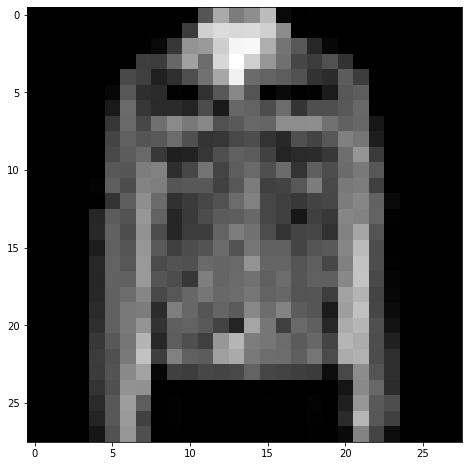

In [18]:
# Select just the pixel columns and convert them to a numpy array by using .values. 
imgs = df[pixel_cols].values
print(type(imgs))

# Select just one image from all the images
img = imgs[404]

# Reshape the image to be a 28x28 matrix (original format of image)
img = img.reshape(28,28)

# Plot reshaped image
plt.figure(figsize=(8,8))
plt.imshow(img, cmap='gray')

___
# 2. Select and engineer our features.
1. Create our `selected_features` that is the list of the columns we are going to use as our `X` data. 
2. Define our `X` and `y` data. 
2. Train-test-split our `X` and `y` data

### 1. Create our `selected_features` that is the list of the columns we are going to use as our `X` data. 

In [22]:
# DOING THIS AGAIN JUST FOR PRACTICE 

# Grabs all of the columns 
selected_features = df.columns

# Convert the all columns object into a regular list
selected_features = list(selected_features)

# Sanity check that it is now just a list.
print(type(selected_features))

# Remove the label column from the list
# This happnes 'in place'
selected_features.remove('label')

<class 'list'>


### 2. Define our `X` and `y`

In [23]:
# 2. Define our `X` and `y` data. 

X = df[selected_features]

y = df['label']

### 3. Train-test-split our `X` and `y` data

In [24]:
# 3. Train-test-split our `X` and `y` data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 10222021)

____
# 3. Build and train our model
1. Initalize an empty Support Vector Classifier model.
2. Fit that model with our training data. 

In [25]:
# 1. Initalize an empty Support Vector Classifier model.
from sklearn import svm

# Initalize our Support Vector Classifier
model = svm.SVC()

In [26]:
# 2. Fit that model with our training data. 
model.fit(X_train, y_train)

SVC()

___
# 4. Evaluate our model
1. Get a baseline accuracy score.
2. Make new predictions using our test data. 
3. Print the classification report. 
4. Plot the confusion matrix of our predicted results. 

### 1. Get a baseline accuracy score.

In [27]:
### 1. Get and print a baseline accuracy score.
accuracy = model.score(X_test, y_test)
print("Accuracy %f" % accuracy)

Accuracy 0.838667


### 2. Make new predictions using our test data. 

In [28]:
### 2. Make new predictions using our test data. 
y_pred = model.predict(X_test)

### 3. Print the classification report. 
Use the sklearn helper fuction for this. 

In [29]:
### 3. Print the classification report. 
print(metrics.classification_report(y_test, y_pred))


              precision    recall  f1-score   support

  Ankle boot       0.90      0.95      0.92       149
         Bag       0.92      0.97      0.94       144
        Coat       0.75      0.77      0.76       161
       Dress       0.76      0.87      0.81       150
    Pullover       0.73      0.80      0.76       149
      Sandal       0.95      0.95      0.95       172
       Shirt       0.69      0.53      0.60       148
     Sneaker       0.91      0.86      0.88       147
 T-shirt/top       0.80      0.77      0.78       141
     Trouser       0.98      0.91      0.95       139

    accuracy                           0.84      1500
   macro avg       0.84      0.84      0.84      1500
weighted avg       0.84      0.84      0.84      1500



### 4. Plot the confusion matrix of our predicted results. 

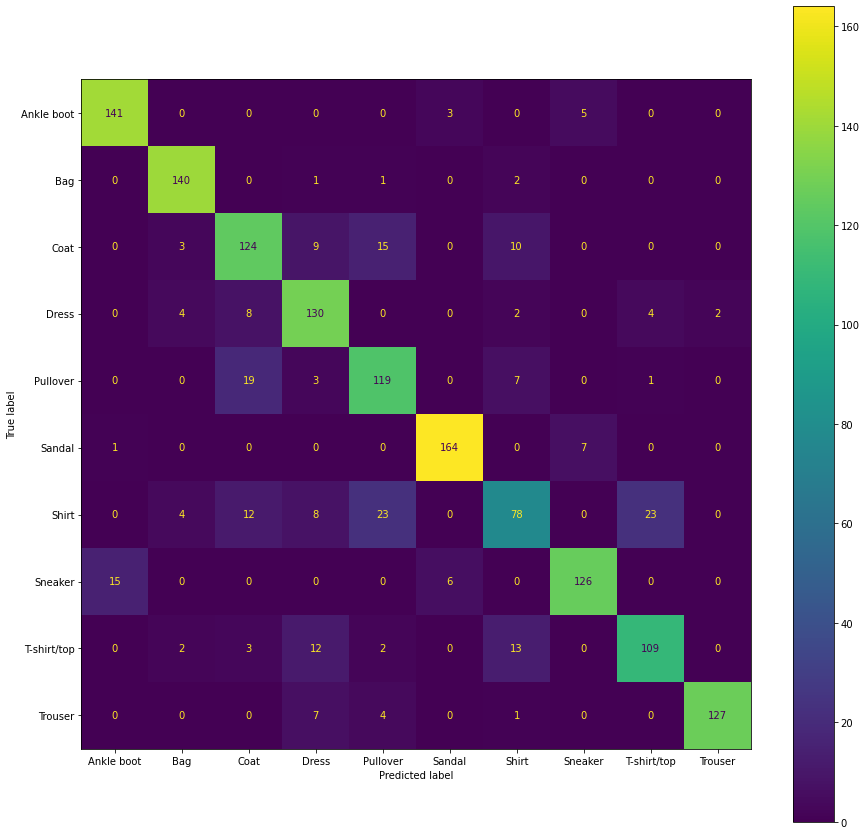

In [30]:
### 4. Plot the confusion matrix of our predicted results.
fig, ax = plt.subplots(figsize=(15,15))
metrics.plot_confusion_matrix(estimator=model, X=X_test, y_true=y_test, ax=ax)

### Looking at the confusion matrix, which two clothing items were mis-classfied with eachother the most?

In [31]:
print('The classifier mistaked T-shirt/top and Shirt the most.')

The classifier mistaked T-shirt/top and Shirt the most.


___
### Build a function thats input is an unfitted model, X, and y data, and runs the whole pipeline and prints a classification report and confusion matrix. 

In [33]:
### Build a function thats input is an empty model, X, and y data, and runs the whole pipeline and prints a classification report and confusion matrix. 
def build_and_eval_model(model, X, y, random_state=23):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = random_state)
    
    model.fit(X_train, y_train)
    
    accuracy = model.score(X_test, y_test)
    print("Accuracy %f" % accuracy)
    
    y_pred = model.predict(X_test)
    print(metrics.classification_report(y_test, y_pred))
    
    fig, ax = plt.subplots(figsize=(15,15))
    metrics.plot_confusion_matrix(estimator=model, X=X_test, y_true=y_test, ax=ax)

## Run LogisticRegression, RandomForest, and Multinomial Naive Bayes through the function you just built and compare the results. 
1. Which classifier did the best, and which classifier did the worst. 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy 0.812000
              precision    recall  f1-score   support

  Ankle boot       0.92      0.94      0.93       160
         Bag       0.91      0.94      0.93       148
        Coat       0.69      0.74      0.71       150
       Dress       0.80      0.83      0.81       145
    Pullover       0.76      0.73      0.74       162
      Sandal       0.93      0.86      0.90       161
       Shirt       0.61      0.52      0.56       153
     Sneaker       0.85      0.90      0.87       141
 T-shirt/top       0.69      0.74      0.71       140
     Trouser       0.94      0.94      0.94       140

    accuracy                           0.81      1500
   macro avg       0.81      0.81      0.81      1500
weighted avg       0.81      0.81      0.81      1500



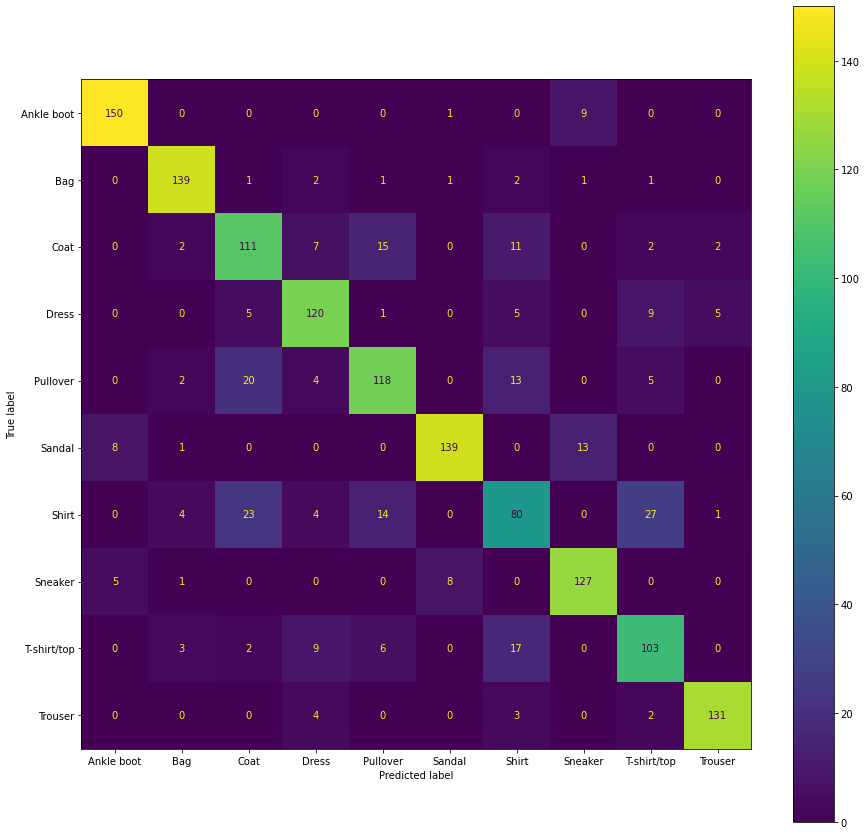

In [36]:
# LogisticRegression
build_and_eval_model(model = LogisticRegression(), X = X, y = y)

Accuracy 0.851333
              precision    recall  f1-score   support

  Ankle boot       0.92      0.91      0.92       160
         Bag       0.91      0.97      0.94       148
        Coat       0.71      0.83      0.77       150
       Dress       0.84      0.94      0.89       145
    Pullover       0.79      0.74      0.77       162
      Sandal       0.95      0.91      0.93       161
       Shirt       0.70      0.57      0.63       153
     Sneaker       0.88      0.89      0.88       141
 T-shirt/top       0.82      0.82      0.82       140
     Trouser       0.99      0.94      0.97       140

    accuracy                           0.85      1500
   macro avg       0.85      0.85      0.85      1500
weighted avg       0.85      0.85      0.85      1500



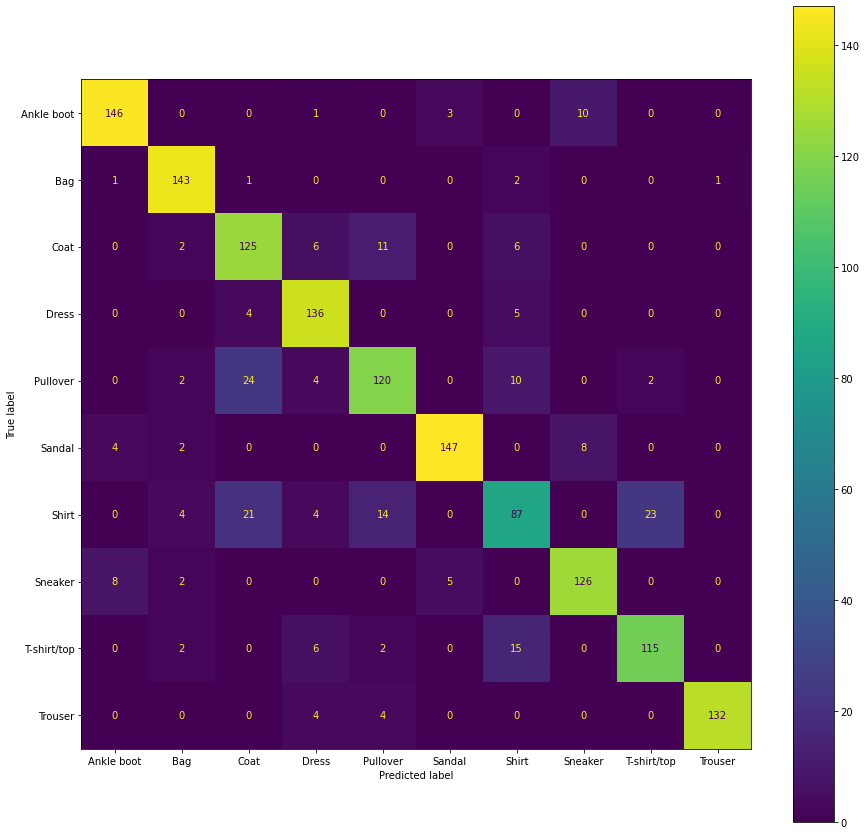

In [38]:
# RandomForest
build_and_eval_model(model = RandomForestClassifier(), X = X, y = y)

Accuracy 0.846667
              precision    recall  f1-score   support

  Ankle boot       0.90      0.91      0.91       160
         Bag       0.92      0.97      0.95       148
        Coat       0.78      0.85      0.81       150
       Dress       0.83      0.92      0.87       145
    Pullover       0.80      0.71      0.75       162
      Sandal       0.94      0.89      0.91       161
       Shirt       0.66      0.58      0.62       153
     Sneaker       0.85      0.89      0.87       141
 T-shirt/top       0.78      0.83      0.80       140
     Trouser       1.00      0.94      0.97       140

    accuracy                           0.85      1500
   macro avg       0.85      0.85      0.85      1500
weighted avg       0.85      0.85      0.84      1500



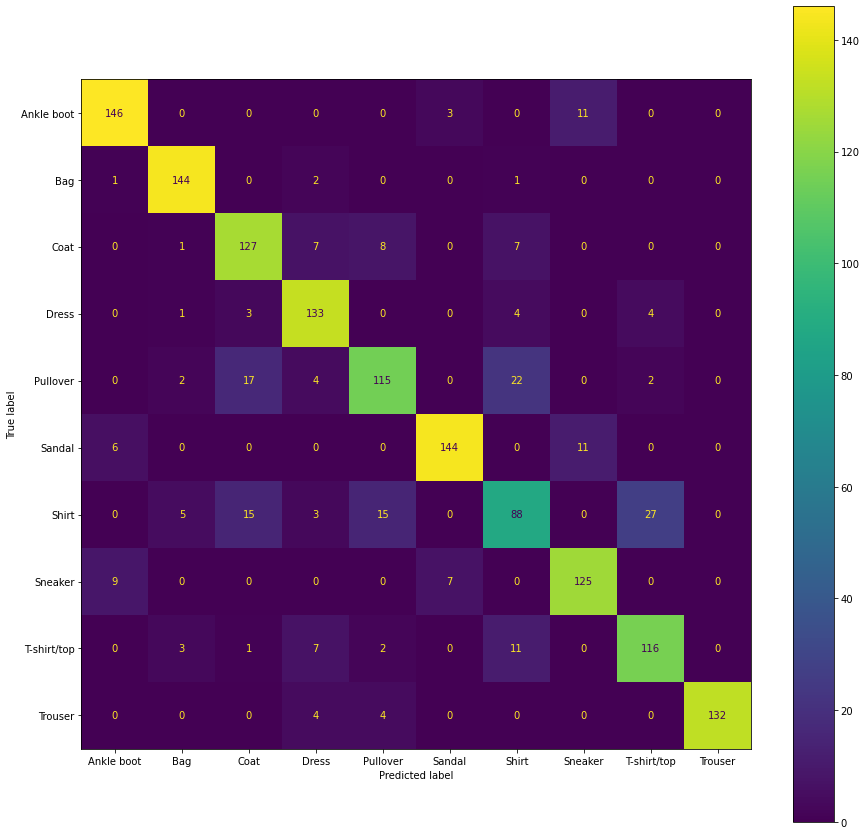

In [41]:
# MultinomialNB
build_and_eval_model(model = svm.SVC(), X = X, y = y)

In [42]:
print('RandomForest model did the best and LogisticRegression model did the worst.')

RandomForest model did the best and LogisticRegression model did the worst.
